In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path='EastWestAirlines.xlsx'
df=pd.read_excel(file_path,sheet_name=1,engine='openpyxl')

In [3]:
df.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.shape

(3999, 12)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [7]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
z=df.corr()

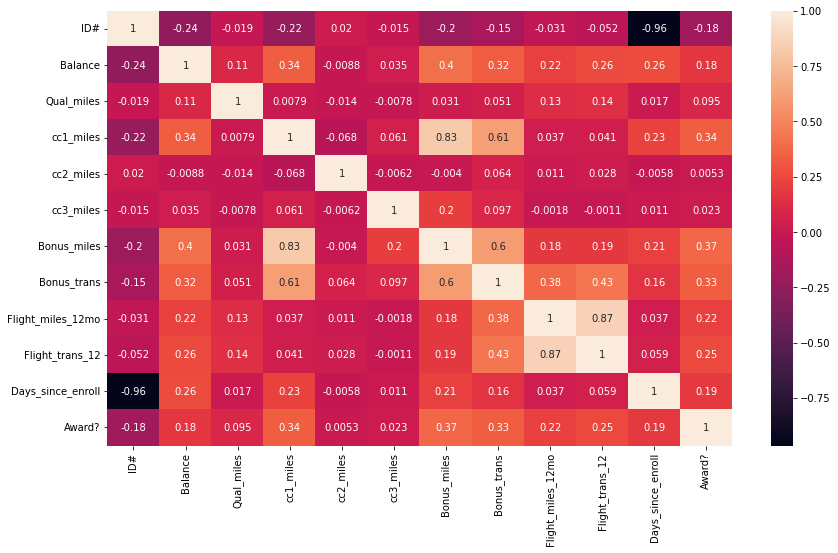

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(z,annot=True)
plt.show()

Highly correlated columns are bonus_miles and id ,bonus_miles and cc1_miles, flight_miles_12mo and flight_trans_12

# Data Distribution

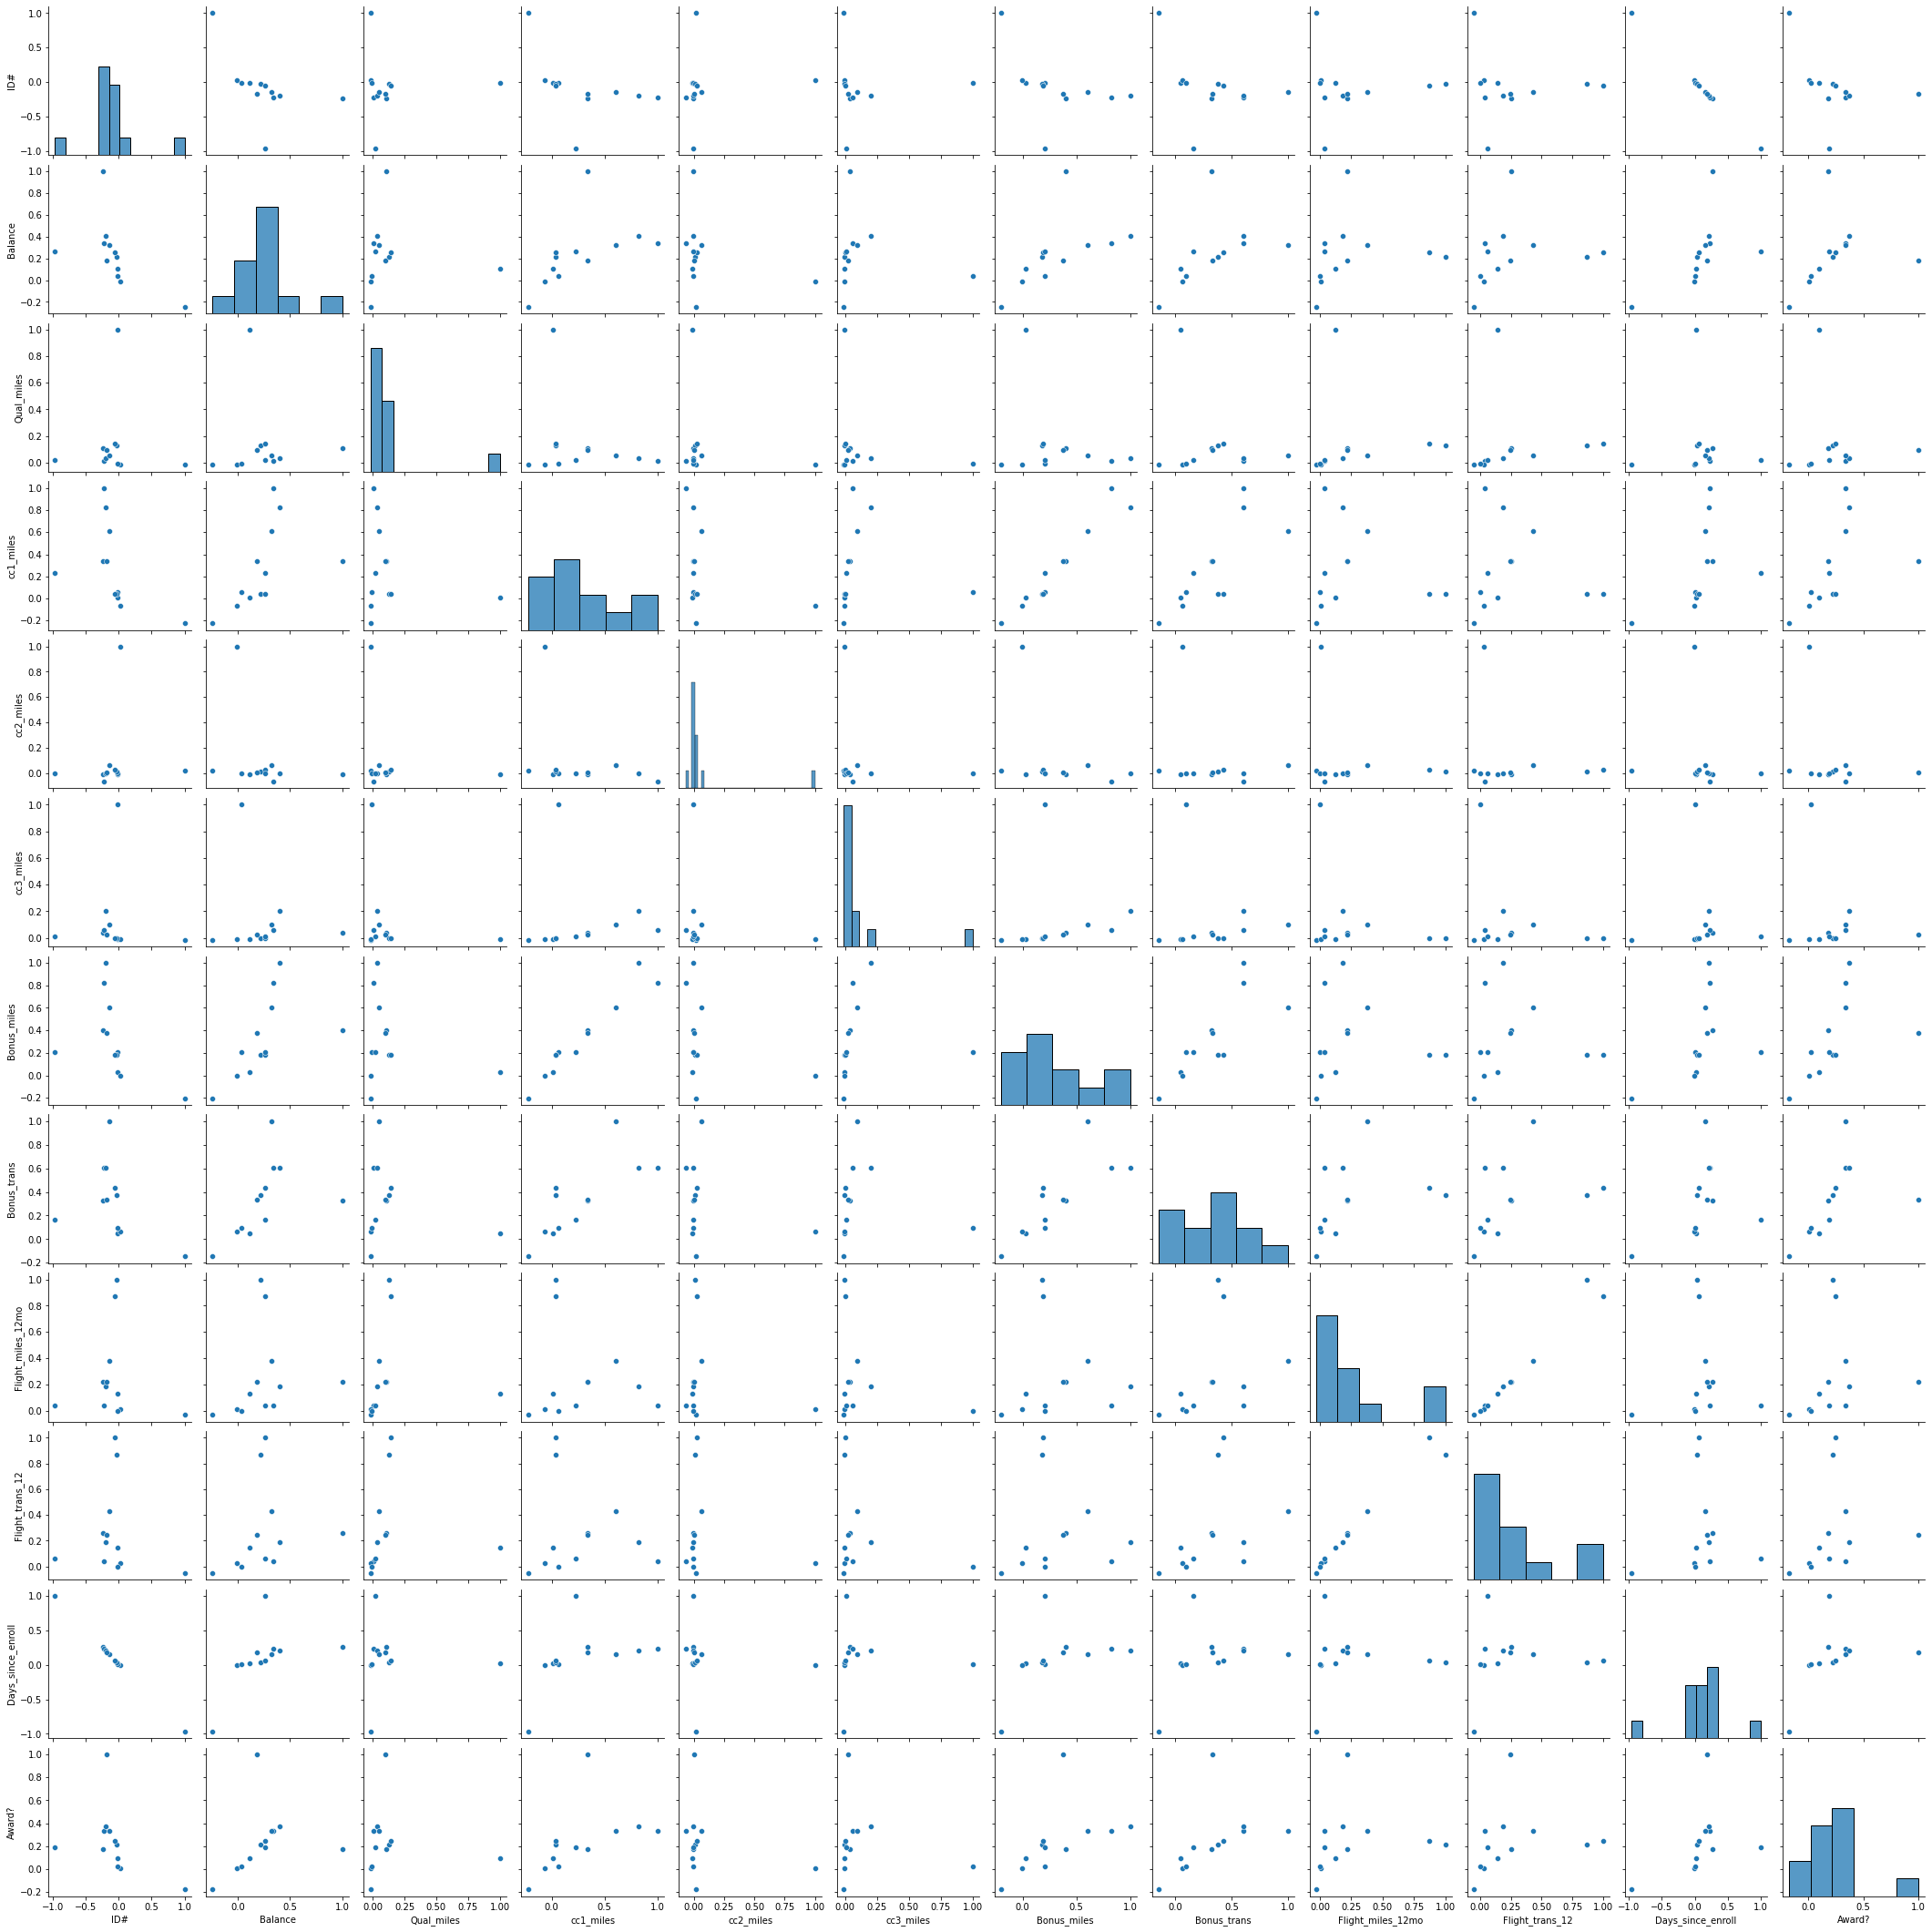

In [10]:
sns.pairplot(z)
plt.show()

In [11]:
features=["Balance","Bonus_miles","Bonus_trans","Flight_miles_12mo","cc2_miles","cc3_miles","Days_since_enroll"]

In [12]:
X=df[features].values

In [13]:
X

array([[28143,   174,     1, ...,     1,     1,  7000],
       [19244,   215,     2, ...,     1,     1,  6968],
       [41354,  4123,     4, ...,     1,     1,  7034],
       ...,
       [73597, 25447,     8, ...,     1,     1,  1402],
       [54899,   500,     1, ...,     1,     1,  1401],
       [ 3016,     0,     0, ...,     1,     1,  1398]], dtype=int64)

In [14]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)


In [15]:
from sklearn.cluster import KMeans

wccs=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wccs.append(kmeans.inertia_)
    

In [16]:
wccs

[27992.999999999993,
 22698.684046797283,
 18975.151355599883,
 15444.768696521782,
 13275.595602488533,
 11332.042545534636,
 9910.14773206518,
 8973.156643147757,
 8304.863024538066,
 7736.544465334549]

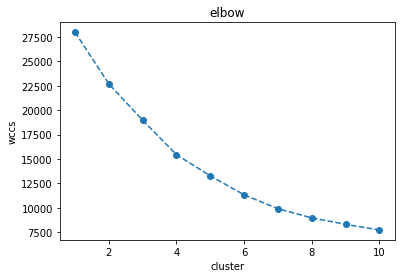

In [33]:
plt.plot(range(1,11),wccs,marker='o',linestyle='--')
plt.title("elbow")
plt.xlabel("cluster")
plt.ylabel("wccs")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
ykmeans=kmeans.fit_predict(X)
ykmeans

array([0, 0, 0, ..., 0, 0, 0])

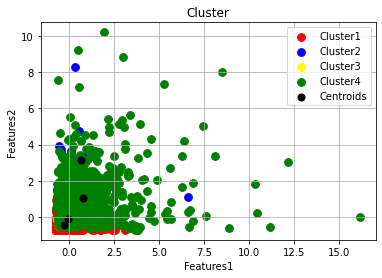

In [19]:
plt.scatter(X[ykmeans==0,0],X[ykmeans==0,1],s=60,c="red",label="Cluster1")
plt.scatter(X[ykmeans==1,0],X[ykmeans==1,1],s=60,c="blue",label="Cluster2")
plt.scatter(X[ykmeans==2,0],X[ykmeans==2,1],s=60,c="yellow",label="Cluster3")
plt.scatter(X[ykmeans==3,0],X[ykmeans==3,1],s=60,c="green",label="Cluster4")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c="black",label="Centroids")

plt.title("Cluster")
plt.xlabel("Features1")
plt.ylabel("Features2")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#hirarchical algorithm clustering 
from sklearn.cluster import AgglomerativeClustering

agglo=AgglomerativeClustering(n_clusters=4,linkage='ward')
y_pred_hir=agglo.fit_predict(X)

In [21]:
y_pred_hir

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

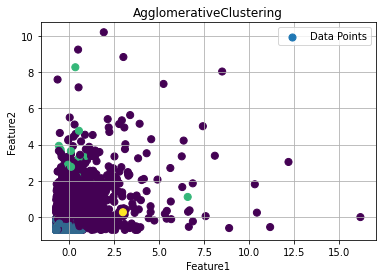

In [22]:
#plot hir cluster 
plt.scatter(X[:,0],X[:,1],c=y_pred_hir,cmap='viridis',s=50,label='Data Points')
plt.title("AgglomerativeClustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.grid(True)
plt.show()

Unique labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


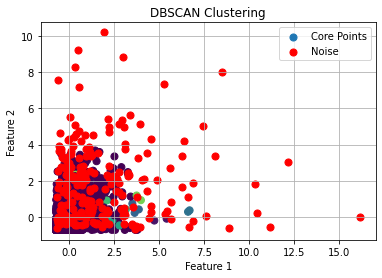

In [23]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.9,min_samples=2)
y_pred_dbscan=dbscan.fit_predict(X)




#identifying core sample work
core_samples_mask=np.zeros_like(dbscan.labels_,dtype=bool)
core_samples_mask[dbscan.core_sample_indices_]=True
label=dbscan.labels_

print("Unique labels:", np.unique(label))

plt.scatter(X[core_samples_mask][:, 0], X[core_samples_mask][:, 1], c=label[core_samples_mask],
            cmap='viridis', s=50, label="Core Points")
# Noise points
plt.scatter(X[~core_samples_mask][:, 0], X[~core_samples_mask][:, 1], c='red', s=50, label="Noise")

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

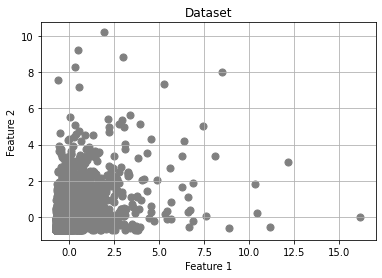

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [25]:
from sklearn.metrics.pairwise import pairwise_distances

distances = pairwise_distances(X)
print("Max distance:", distances.max())
print("Mean distance:", distances.mean())
print("Min distance:", distances.min())


Max distance: 31.36110961710235
Mean distance: 2.8761773579160583
Min distance: 0.0


In [29]:
from sklearn.metrics import silhouette_score


silhouette_kmeans = silhouette_score(X, ykmeans)
silhouette_hir = silhouette_score(X, y_pred_hir)
silhouette_dbscan = silhouette_score(X, y_pred_dbscan)

In [31]:
print(f" kmeans score = {silhouette_kmeans}")
print(f" hir score = {silhouette_hir}")
print(f" dnscan = {silhouette_dbscan}")

 kmeans score = 0.36625526454006785
 hir score = 0.19048037688074176
 dnscan = 0.21181322662515456
